<a href="https://colab.research.google.com/github/rajabhupati/Artificial_intelligence/blob/main/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install hvplot

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
%matplotlib inline

In [7]:
fulfilment_center_info=pd.read_csv("/content/drive/MyDrive/project/fulfilment_center_info.csv")

In [8]:
fulfilment_center_info.head()

center_id  city_code  region_code center_type  op_area
0         11        679           56      TYPE_A      3.7
1         13        590           56      TYPE_B      6.7
2        124        590           56      TYPE_C      4.0
3         66        648           34      TYPE_A      4.1
4         94        632           34      TYPE_C      3.6

In [9]:
meal_info=pd.read_csv("/content/drive/MyDrive/project/meal_info.csv")

In [10]:
meal_info.head()

meal_id   category cuisine
0     1885  Beverages    Thai
1     1993  Beverages    Thai
2     2539  Beverages    Thai
3     1248  Beverages  Indian
4     2631  Beverages  Indian

In [11]:
ip_data=pd.read_csv("/content/drive/MyDrive/project/train.txt",sep="\t")

In [12]:
ip_data

id  week  ...  homepage_featured  num_orders
0       1379560     1  ...                  0         177
1       1466964     1  ...                  0         270
2       1346989     1  ...                  0         189
3       1338232     1  ...                  0          54
4       1448490     1  ...                  0          40
...         ...   ...  ...                ...         ...
456543  1271326   145  ...                  0          68
456544  1062036   145  ...                  0          42
456545  1110849   145  ...                  0         501
456546  1147725   145  ...                  0         729
456547  1361984   145  ...                  0         162

[456548 rows x 9 columns]

In [13]:
ip_data_tmp=pd.merge(meal_info, ip_data, on='meal_id')

In [14]:
ip_data_tmp.head()

meal_id   category  ... homepage_featured  num_orders
0     1885  Beverages  ...                 0         177
1     1885  Beverages  ...                 0        1498
2     1885  Beverages  ...                 0         959
3     1885  Beverages  ...                 1        1025
4     1885  Beverages  ...                 1         445

[5 rows x 11 columns]

In [15]:
train_data=pd.merge(fulfilment_center_info, ip_data_tmp, on='center_id')

In [16]:
train_data.head()

center_id  city_code  ...  homepage_featured num_orders
0         11        679  ...                  0        959
1         11        679  ...                  0       1054
2         11        679  ...                  0        891
3         11        679  ...                  0       1107
4         11        679  ...                  0        919

[5 rows x 15 columns]

In [17]:
#Installing pip install category-encoders

!pip install category-encoders

In [18]:
train_data.describe()

center_id      city_code  ...  homepage_featured     num_orders
count  456548.000000  456548.000000  ...       456548.00000  456548.000000
mean       82.105796     601.553399  ...            0.10920     261.872760
std        45.975046      66.195914  ...            0.31189     395.922798
min        10.000000     456.000000  ...            0.00000      13.000000
25%        43.000000     553.000000  ...            0.00000      54.000000
50%        76.000000     596.000000  ...            0.00000     136.000000
75%       110.000000     651.000000  ...            0.00000     324.000000
max       186.000000     713.000000  ...            1.00000   24299.000000

[8 rows x 12 columns]

In [19]:
train_data.columns

Index(['center_id', 'city_code', 'region_code', 'center_type', 'op_area',
       'meal_id', 'category', 'cuisine', 'id', 'week', 'checkout_price',
       'base_price', 'emailer_for_promotion', 'homepage_featured',
       'num_orders'],
      dtype='object')

EDA



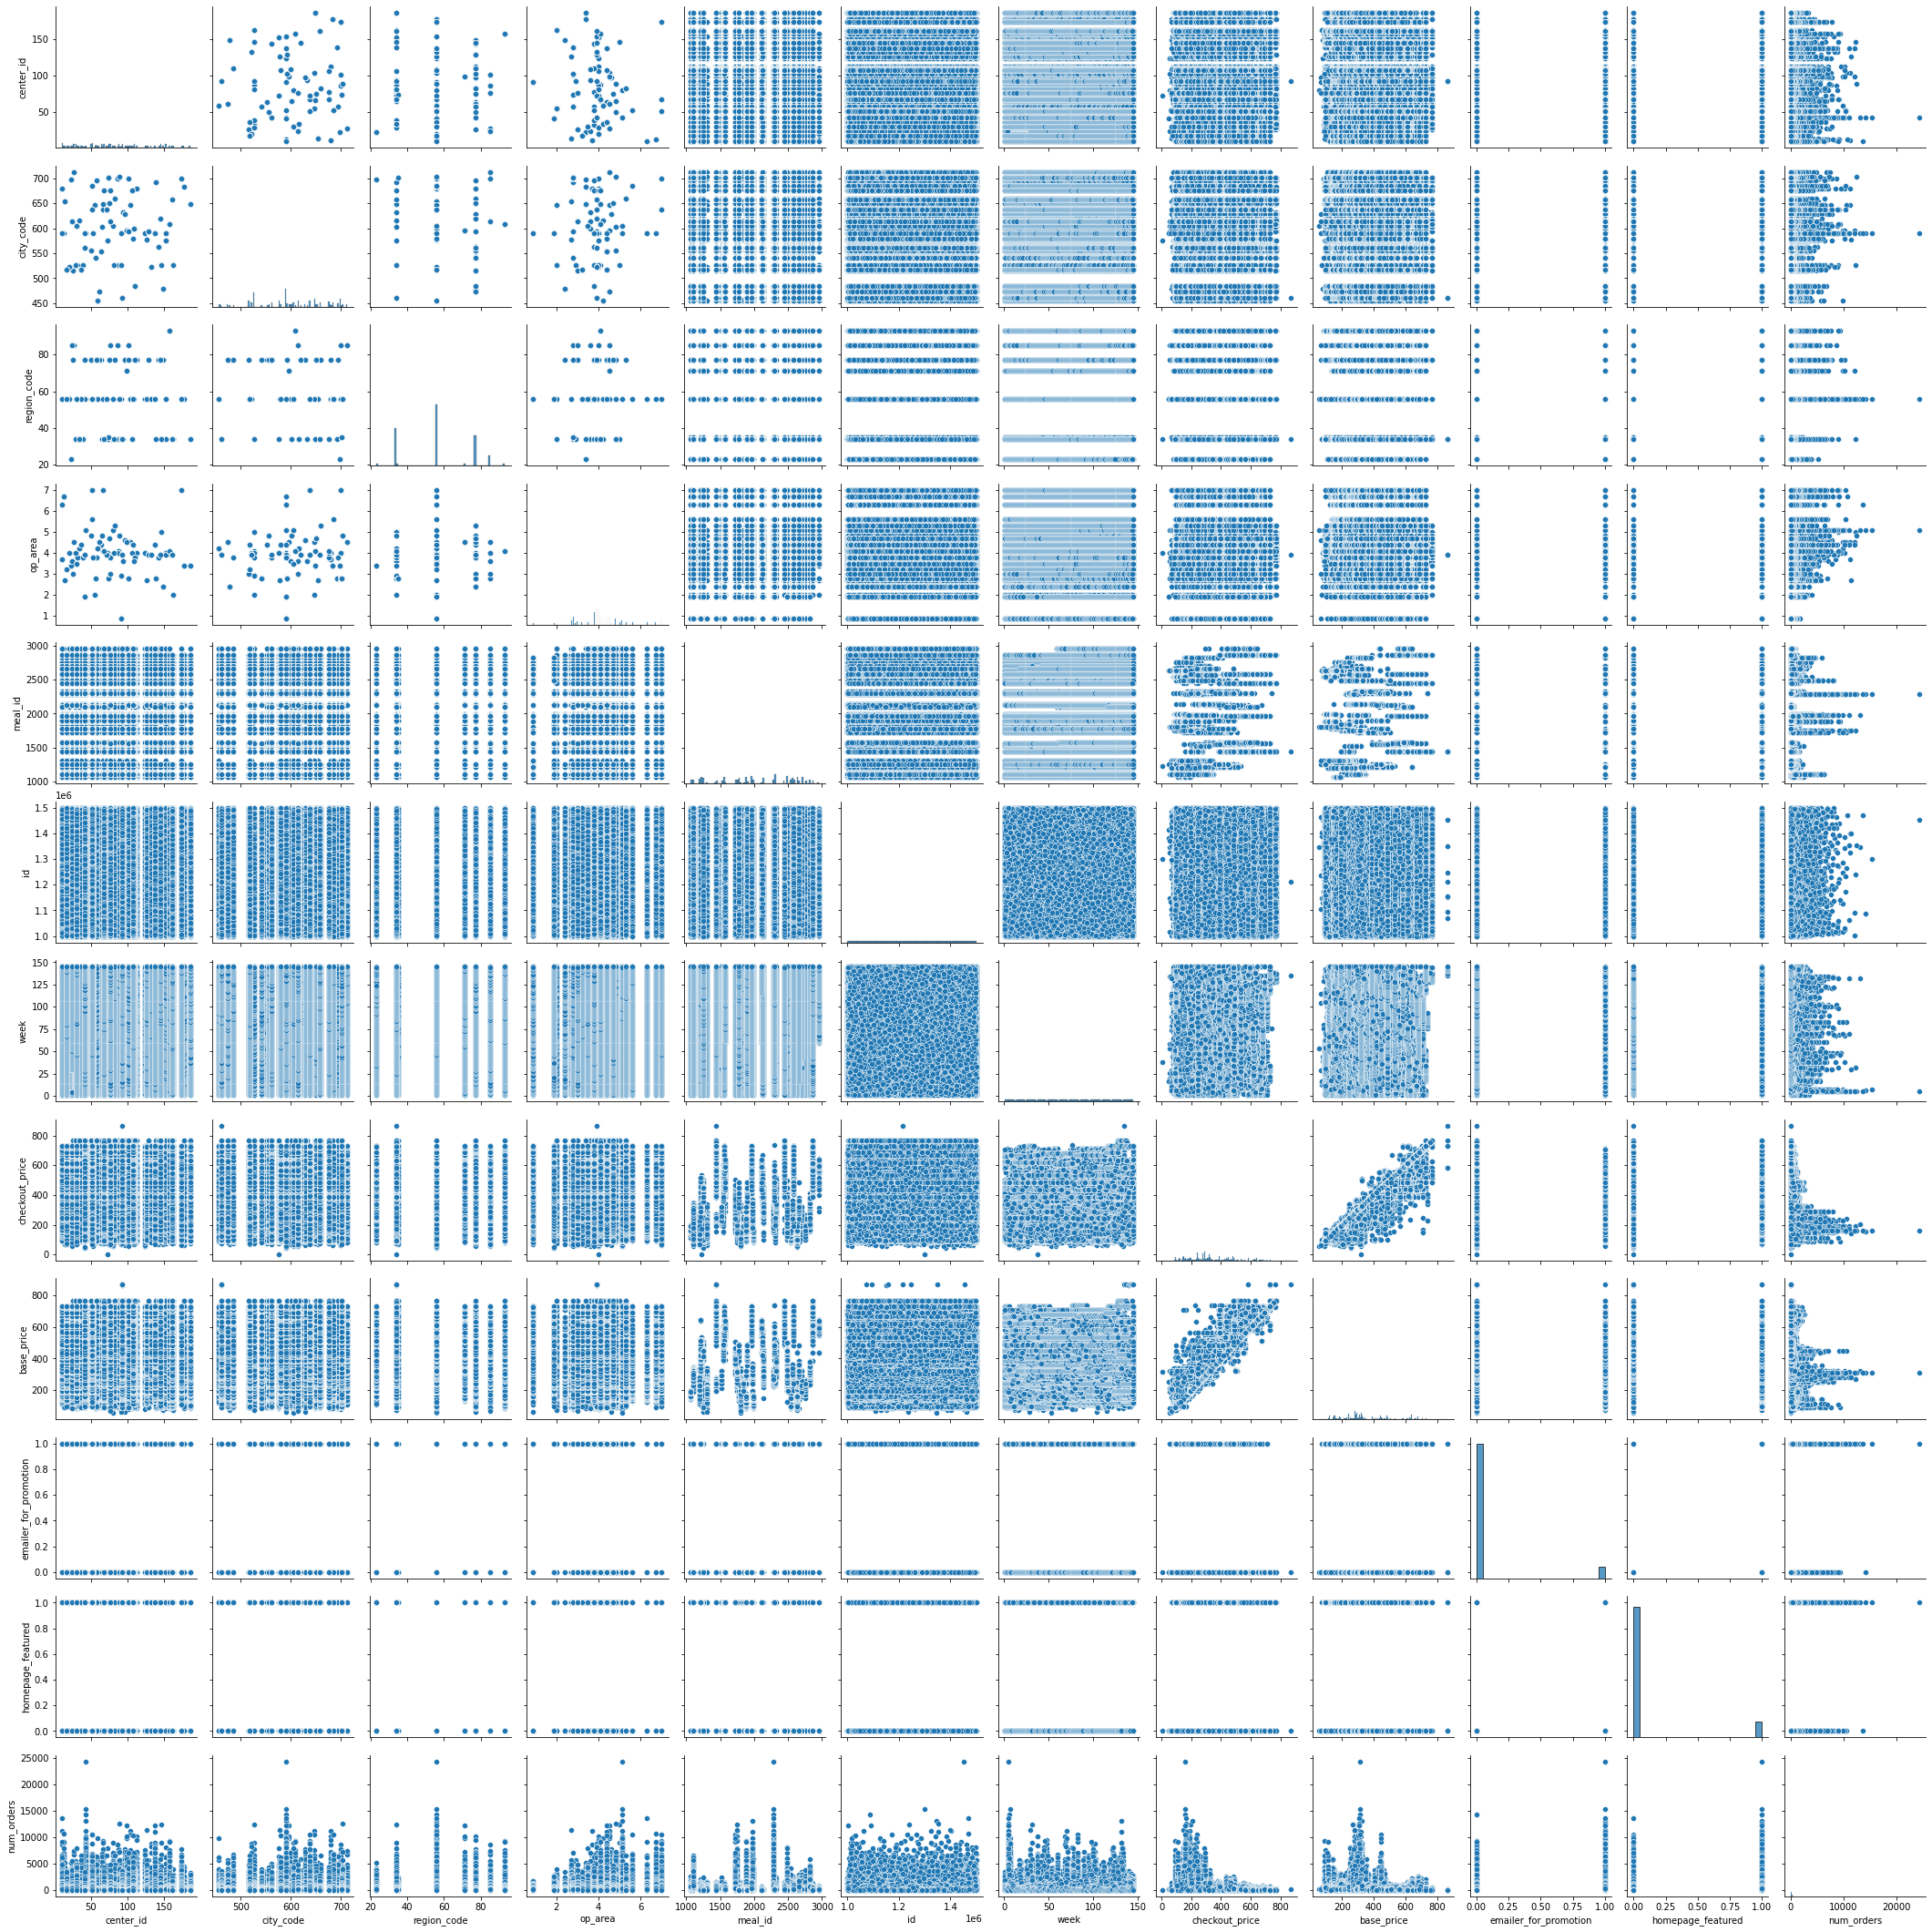

In [20]:
sns.pairplot(train_data)

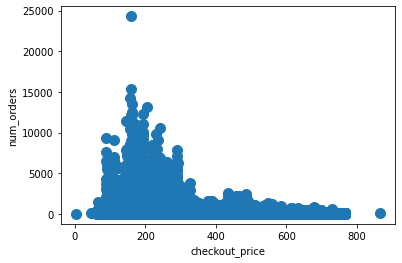

In [21]:
#As check out price increase,Orders decline
train_data.plot.scatter(x = 'checkout_price', y = 'num_orders', s = 100);

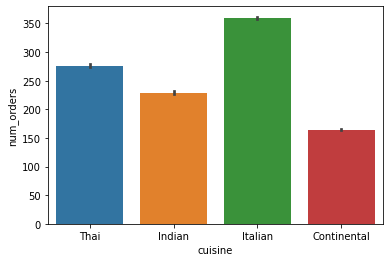

In [22]:
ax = sns.barplot(x="cuisine", y="num_orders", data=train_data)
#Italian restaurants has more orders

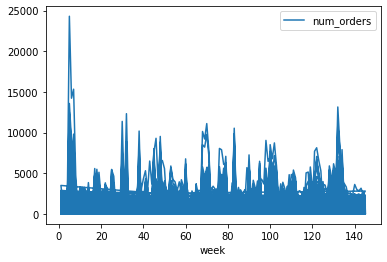

In [23]:
lines = train_data.plot.line(x='week', y='num_orders')

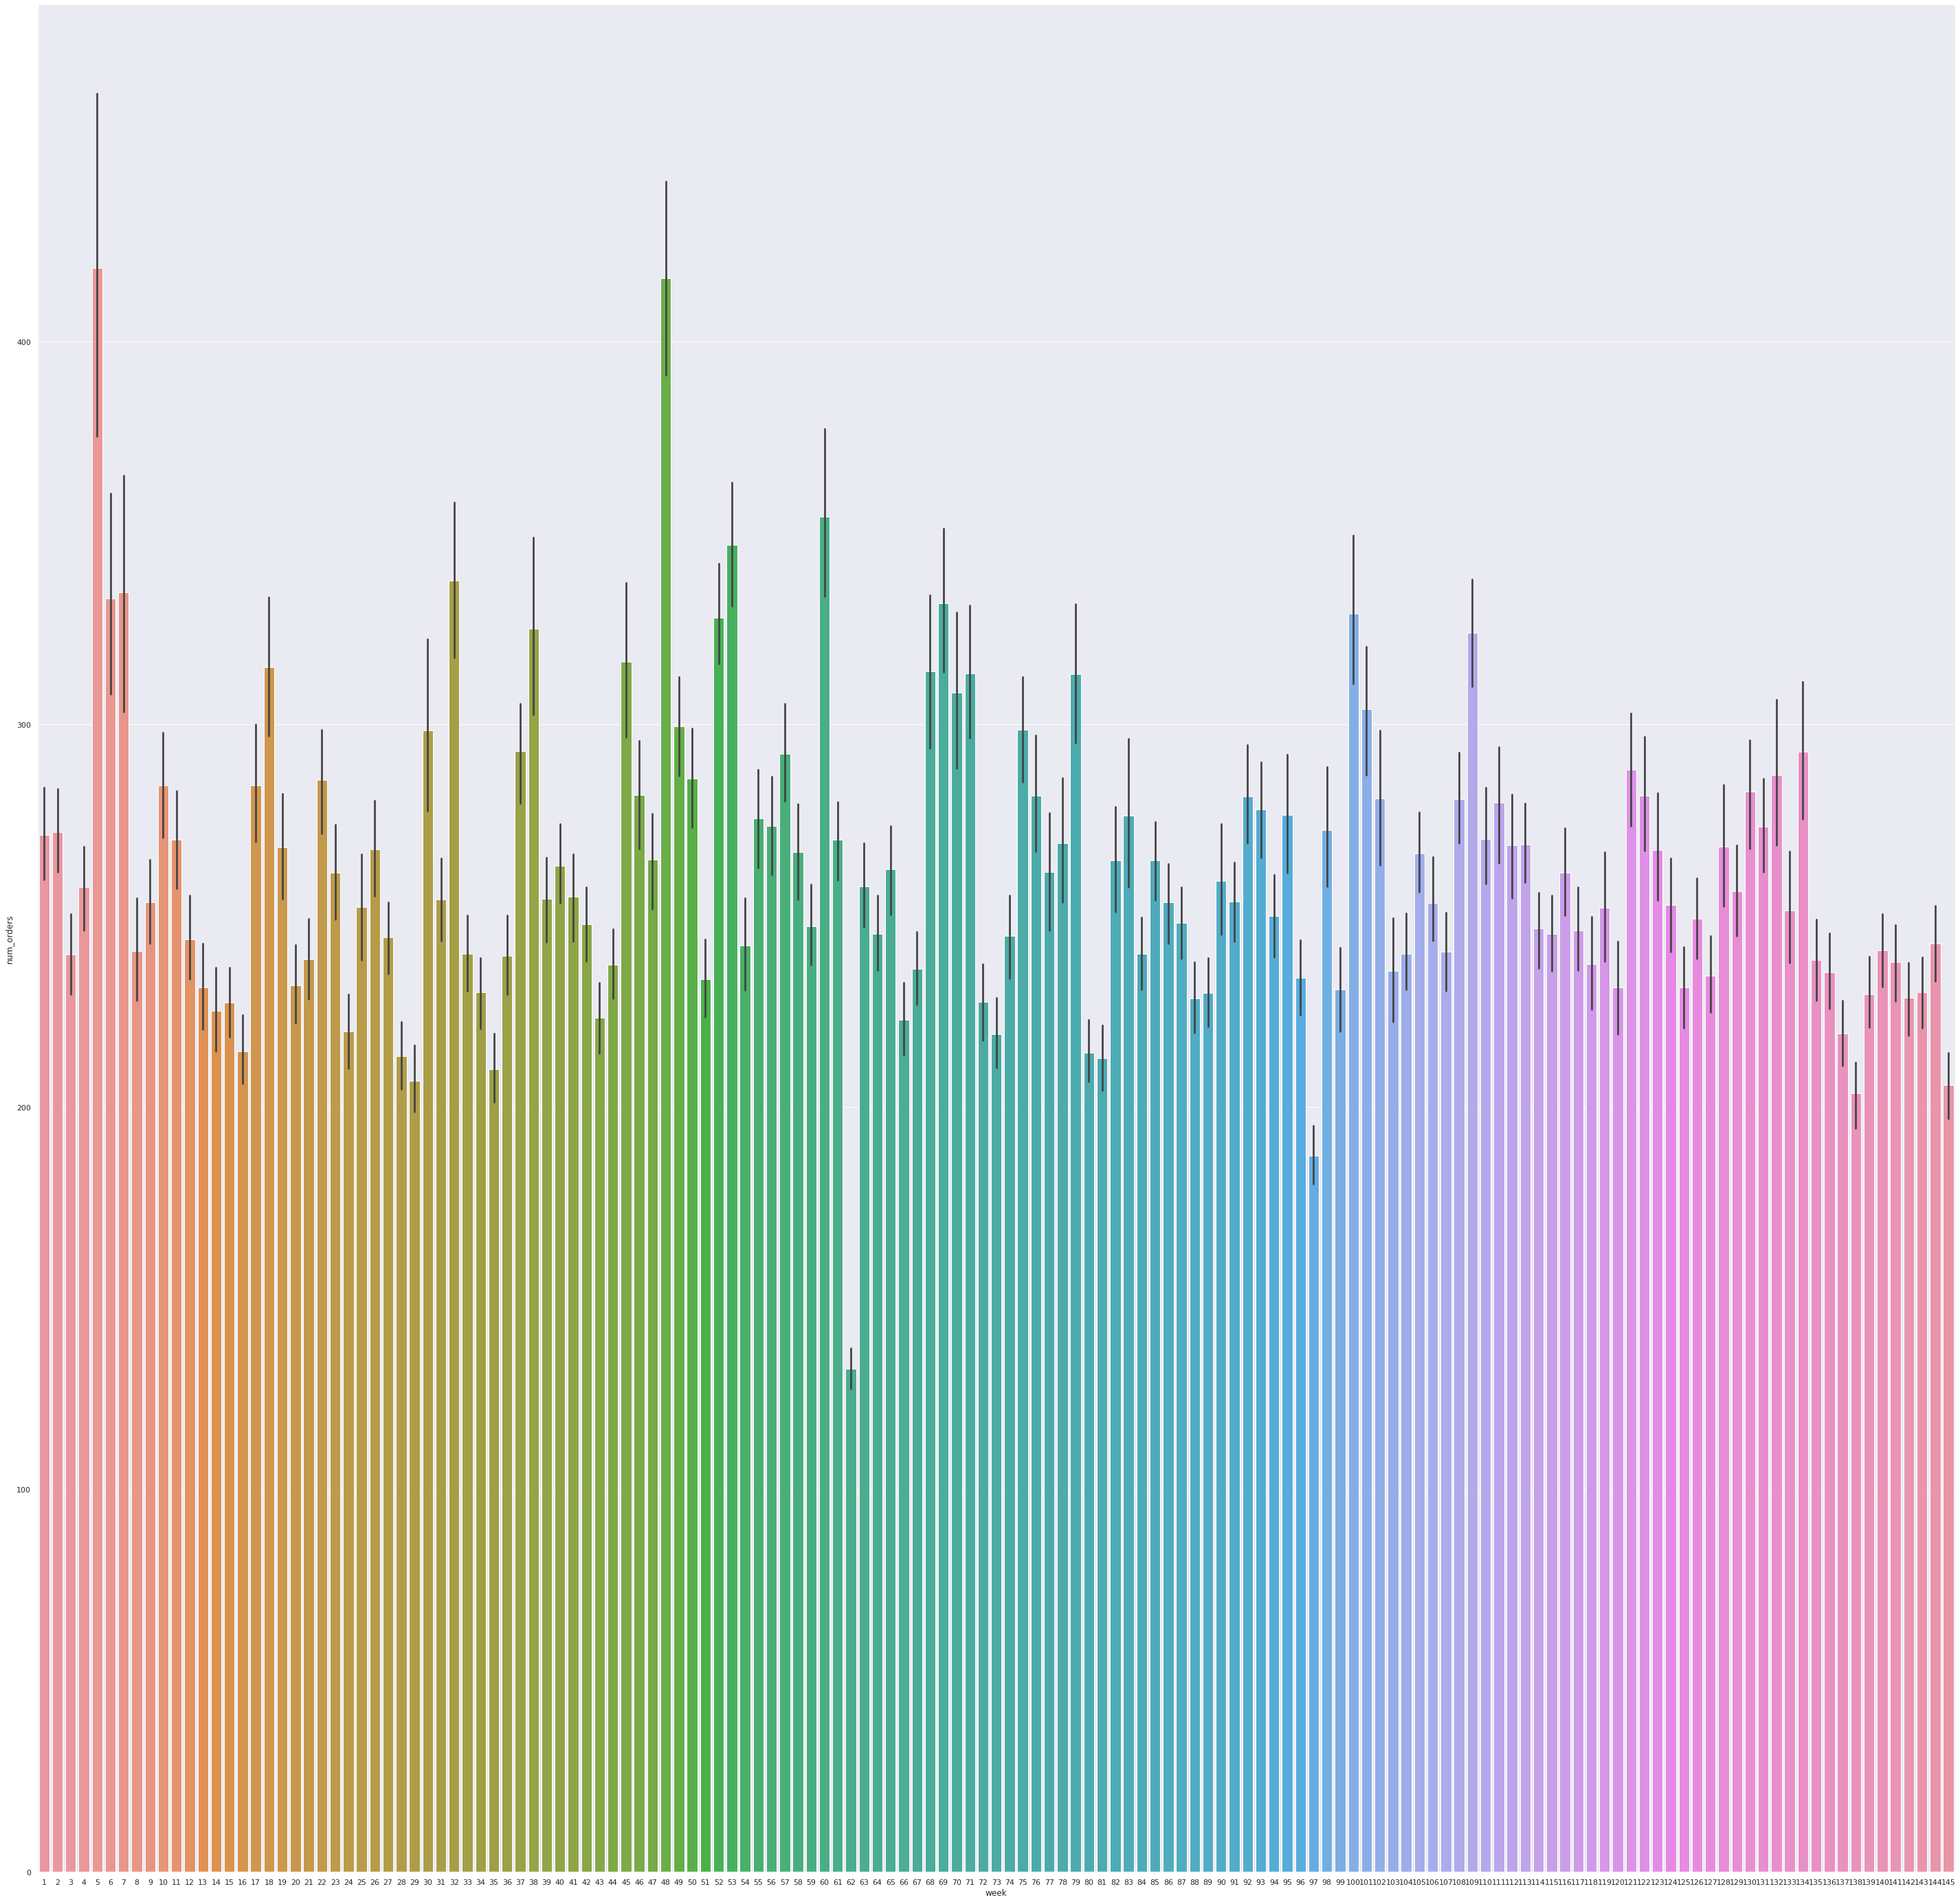

In [24]:
sns.set(rc={'figure.figsize':(50,50)})
ax = sns.barplot(x="week", y="num_orders", data=train_data)
#Italian restaurants has more orders

Testing the Corrleation


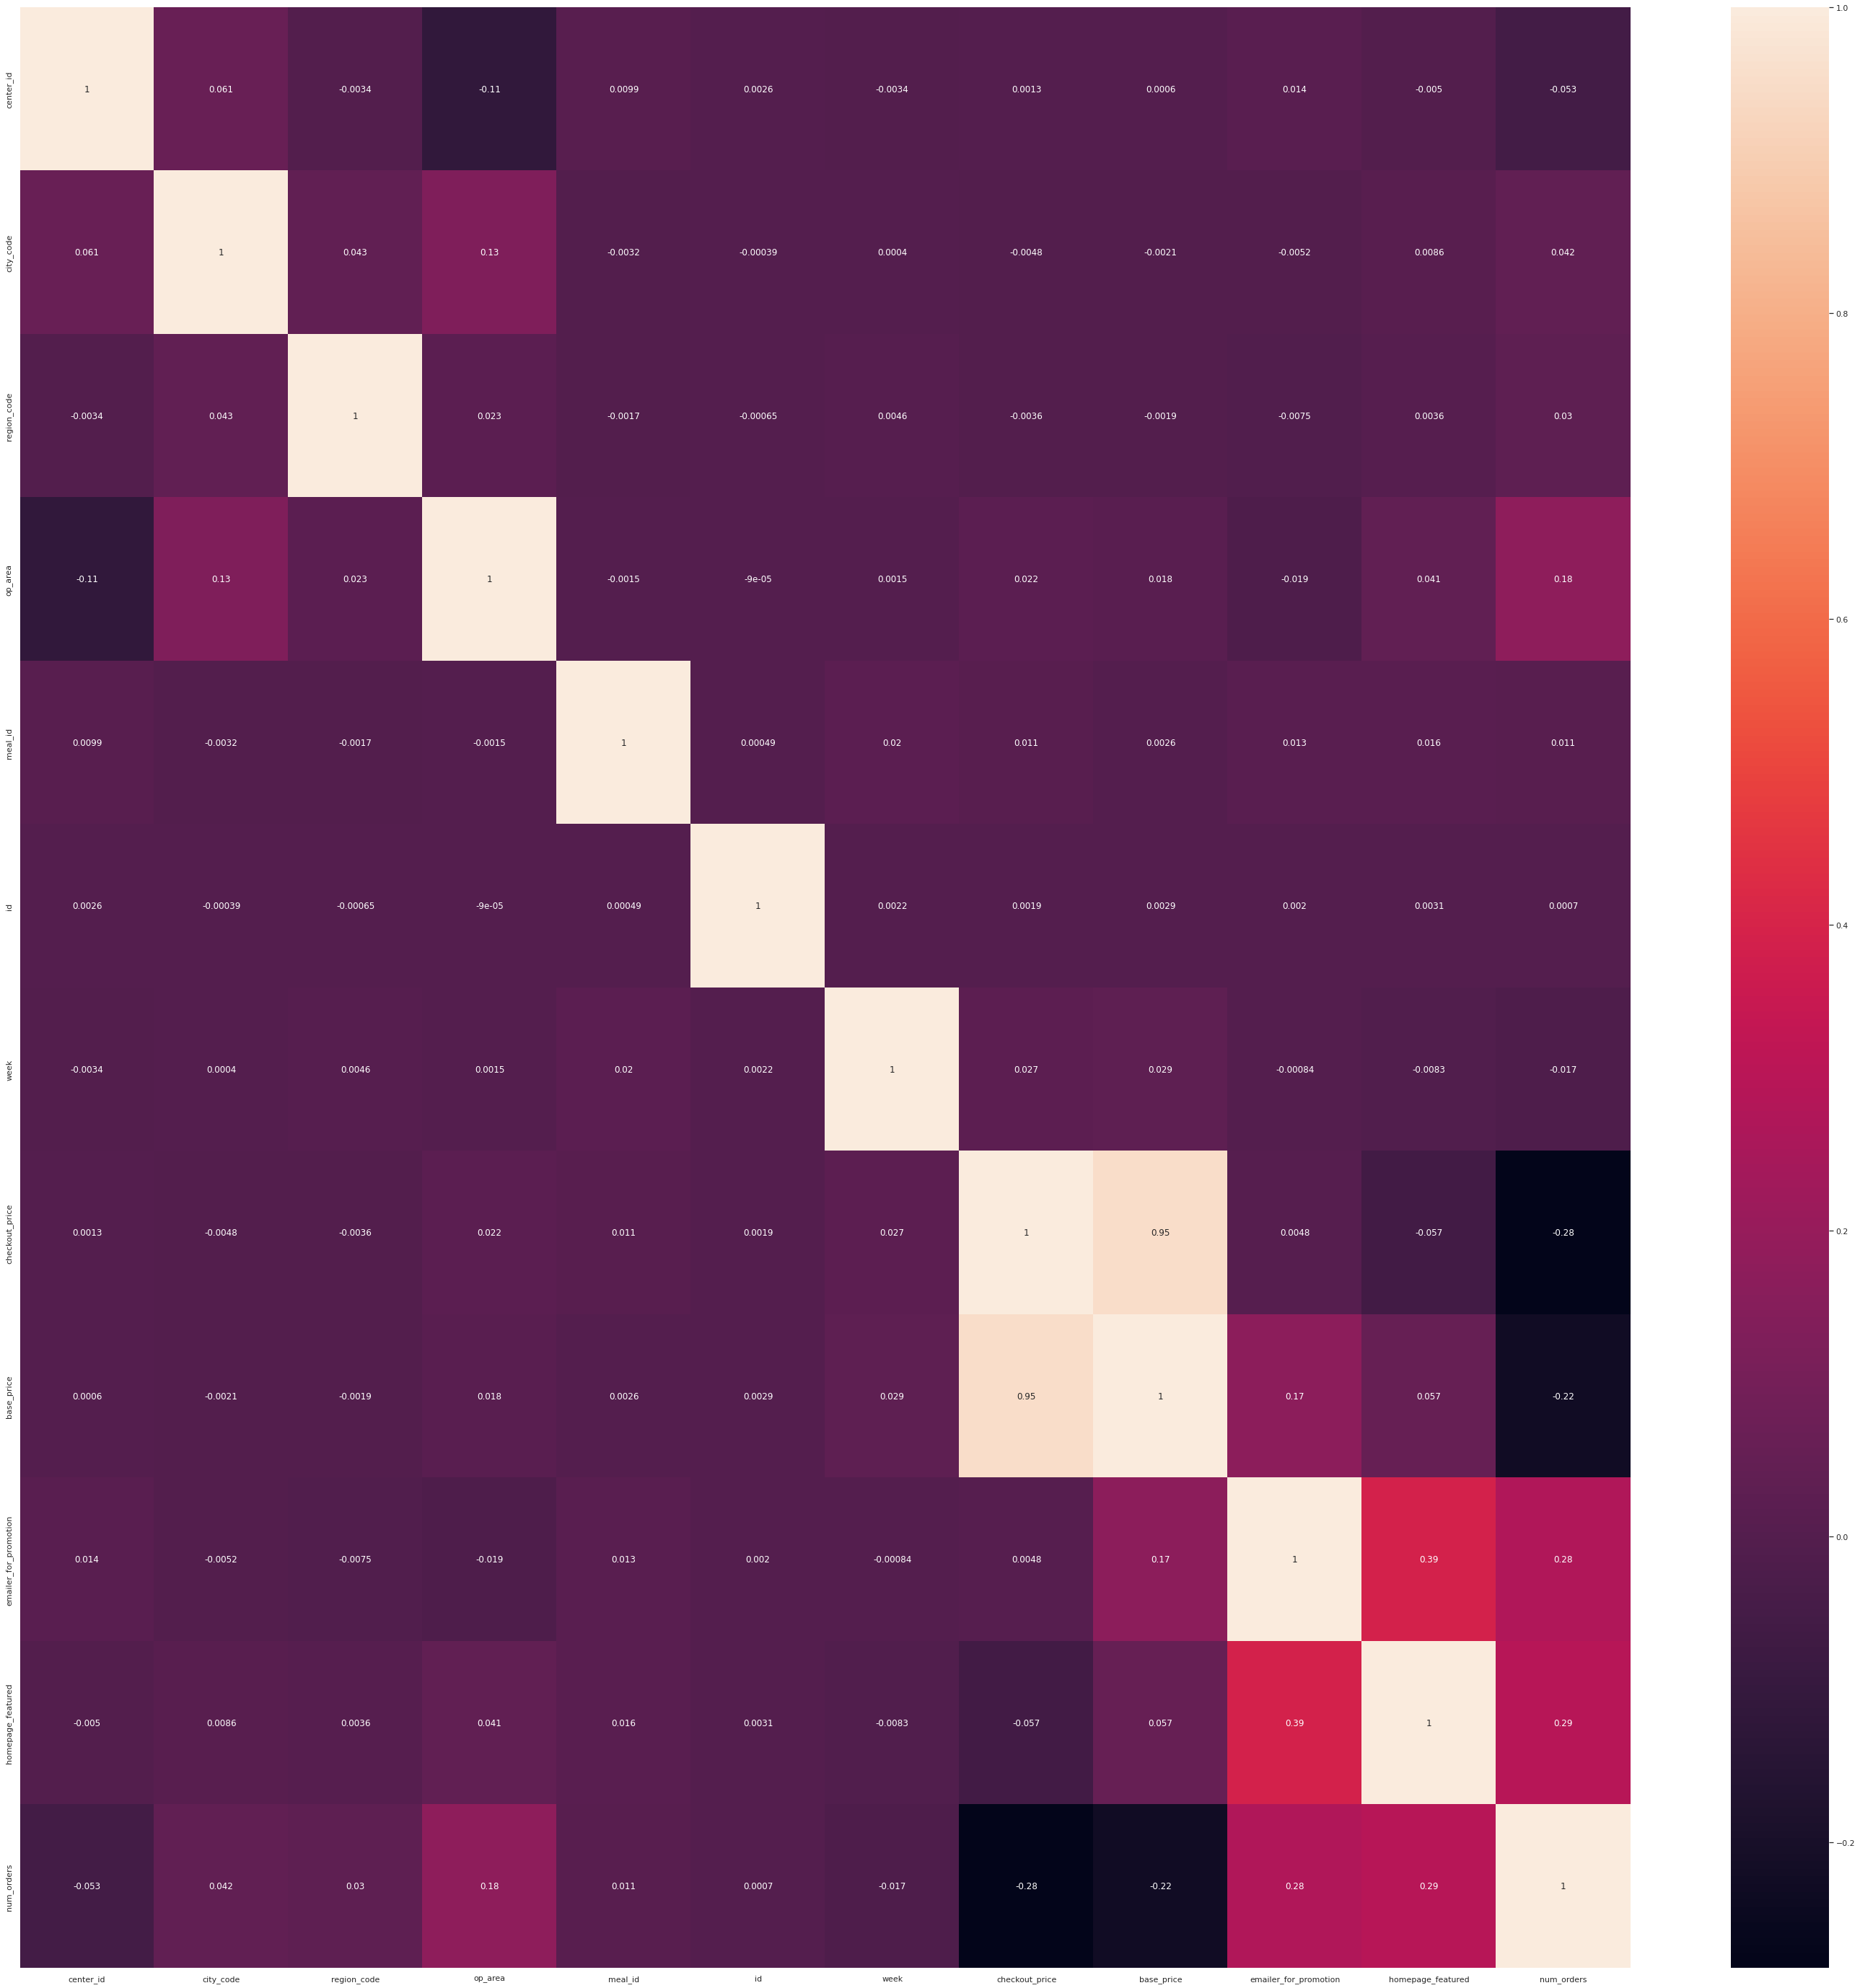

In [25]:
sns.heatmap(train_data.corr(), annot=True)

In [26]:
X = train_data[['center_id', 'city_code', 'region_code', 'center_type', 'op_area',
       'meal_id', 'category', 'cuisine', 'id', 'week', 'checkout_price',
       'base_price', 'emailer_for_promotion', 'homepage_featured']]
y = train_data['num_orders']


Using get dummies to convert categorical to Numerical


In [34]:
training_numeric_dataset=pd.get_dummies(train_data)

In [35]:
df=training_numeric_dataset


Removing the outlier Based on Zscore

In [36]:
def remove_outliers(x):

## storing names of columns in Column_Names
  Column_Names=x.columns

## importing matplotlib and seaborn for visualisation of outliers
  import matplotlib.pyplot as plt
  import seaborn as sns   

## iterating through Column_Names using try and except for distinguishing between numerical and categorical columns
  for j in Column_Names:
      try:
          print('Before Removing Outliers for',+str(j))

          ##visualisation of outliers
          a = sns.boxplot(data=x,x=x[j])
          plt.tight_layout() 
          plt.show() 

          xy=x[j]    
          mydata=pd.DataFrame()

          updated=[]
          Q1,Q3=np.percentile(xy,[25,75])
          IQR=Q3-Q1
          minimum=Q1-1.5*IQR
          maximum=Q3+1.5*IQR

          ## using the maximum and minimum values obtained from quartiles and inter-quartile range
          ## any outliers greater than maximum are updated to be equal to maximum
          ## any outliers lesser than minimum are updated to be equal to minimum
          ## here, no outliers have been removed to prevent loss of data

          for i in xy:
            if(i>maximum):
              i=maximum
              updated.append(i)
            elif(i<minimum):
              i=minimum
              updated.append(i)
            else:
              updated.append(i)

          x[j]=updated
          print('After Removing Outliers',+str(j))

          ## visualising after removing outliers
          b= sns.boxplot(data=x,x=x[j])
          plt.tight_layout() 
          plt.show()

      except:
        continue
  return x

In [38]:
data=remove_outliers(df)

In [39]:
data.head()

center_id  city_code  ...  cuisine_Italian  cuisine_Thai
0         11        679  ...                0             1
1         11        679  ...                0             1
2         11        679  ...                0             1
3         11        679  ...                0             1
4         11        679  ...                0             1

[5 rows x 33 columns]

# mix-max scale the data between 0 and 1

In [47]:
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)

NameError: ignored